# Popularity Based Recommender

In this notebook, we provide a blue print of how to implement a popularity based recommender system. We demonstrate and example by finding the 20 most popular items in the most recent month of the data. We then implement a similar version of this idea in our web application in the form of "Today's Top 10" a la Netflix.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import mean_squared_error, mean_absolute_error

import support_victor_machine as supp

In [7]:
data = pd.read_csv('../data/transactions_cleaned.csv', date_parser='t_dat')

data.dtypes

Unnamed: 0            int64
t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

In [8]:
data.drop(columns='Unnamed: 0', inplace=True)

In [9]:
data.tail()

,t_dat,customer_id,article_id,price,sales_channel_id
31651673,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31651674,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31651675,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31651676,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1
31651677,2020-09-22,fffef3b6b73545df065b521e19f64bf6fe93bfd450ab20...,898573003,0.033881,2


In [10]:
# look at the the very last month's worth of transactions
most_recent = data[ data['t_dat'] > '2020-08-21' ]

most_recent

,t_dat,customer_id,article_id,price,sales_channel_id
30464625,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,913688003,0.033881,2
30464626,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,913688003,0.033881,2
30464627,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,923460001,0.042356,2
30464628,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,934380001,0.050831,2
30464629,2020-08-22,0001d44dbe7f6c4b35200abdb052c77a87596fe1bdcc37...,913688001,0.033881,2
...,...,...,...,...,...
31651673,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31651674,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31651675,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31651676,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [11]:
most_recent.nunique()

t_dat                   32
customer_id         256244
article_id           29507
price                 4667
sales_channel_id         2
dtype: int64

- So from Aug 22nd to Sept 22nd 2020, the H&M website had 256,000+ customers and sold 29,507 distinct items.

In [15]:
most_recent_sales = most_recent.value_counts('article_id')

most_recent_sales[0:20]

article_id
751471001    3080
915529003    2582
915526001    2573
918292001    2565
706016001    2565
751471043    2550
448509014    2134
898694001    2088
863595006    1985
909370001    1868
850917001    1847
714790020    1841
896152002    1778
924243001    1705
918522001    1702
715624001    1694
915529001    1659
915526002    1640
673677002    1636
852584001    1602
dtype: int64

In [19]:
def get_image(prod_code):
    prod_string = '0'+str(prod_code)
    path = '../images/'+prod_string[0:3]
    
    return mpimg.imread(path+'/'+prod_string+'.jpg')

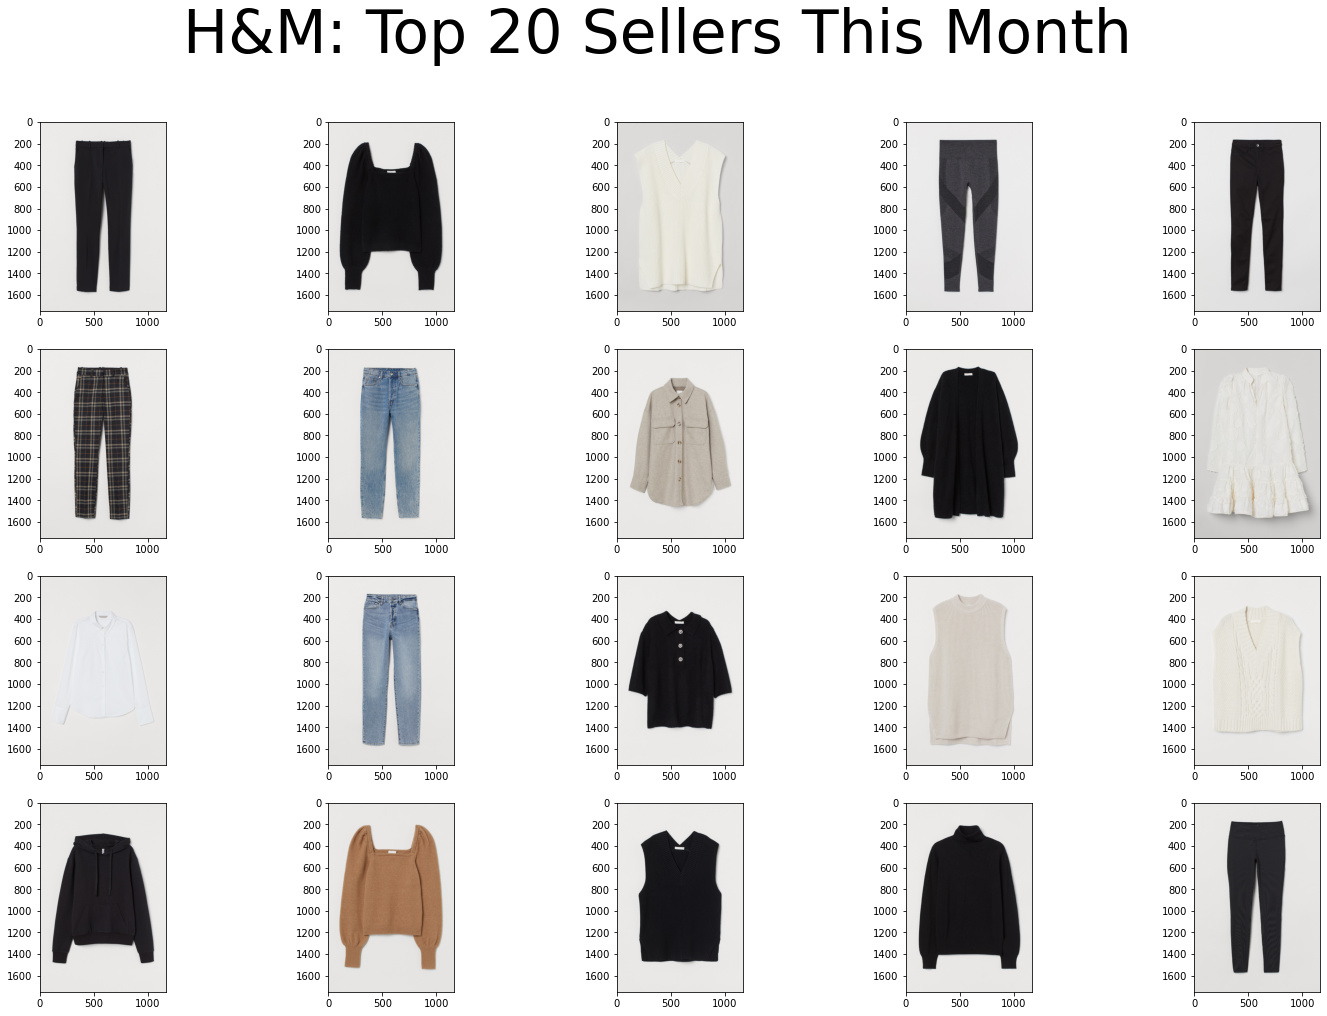

In [23]:
fig = plt.figure(figsize=(25, 16))

rows=4
columns=5

for i in range(20):
    fig.add_subplot(rows, columns, i+1)
    img = get_image(most_recent_sales.index[i])
    imgplot = plt.imshow(img)
    
plt.suptitle("H&M: Top 20 Sellers This Month", fontsize=60);